In [1]:
import COSMO_TL as ctl
from COSMO_TL import GammaLoaders as gl
from COSMO_TL import model as md
from COSMO_TL import sigma_functions as sf
torch = ctl.model.torch

c:\Users\efons\anaconda3\envs\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = gl.get_IDAC_df().compute()
df = df.dropna() 
df = df.reset_index(drop=True)
df

,Compound Name1,Compound Name2,ln_gamma1,ln_gamma2,sigma_0_1,sigma_1_1,sigma_2_1,sigma_3_1,sigma_4_1,sigma_5_1,...,TE(corr)_2,DE(corr)_2,q_2,"q+q""_2",Area_2,Volume_2,NE Solvation Energy_2,TE_2,TE(corr)+NE_2,mol_frac
0,1-NONADECANOL,DICUMYLPEROXIDE,"[2.19937, 1.47838, 1.17616, 0.963258, 0.796583...","[2.44357e-15, 0.0137283, 0.0376675, 0.0678265,...",0.0,0.0,0.0,0.0,0.0,0.0,...,-849.744048,-0.014137,-0.05018,-0.00179,311.46286,365.77785,5.040423,-849.735840,-849.736018,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
1,N-DECYLBENZENE,CITRIC-ACID,"[7.35781, 6.488, 5.70323, 5.0014, 4.37511, 3.8...","[-2.54535e-17, 0.0221366, 0.0855566, 0.185603,...",0.0,0.0,0.0,0.0,0.0,0.0,...,-760.358791,-0.035115,-0.02548,-0.00065,193.07545,202.59300,3.839975,-760.352264,-760.352674,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
2,ISOBUTYRONITRILE,"2,6-DIETHYLANILINE","[-0.333301, -0.301982, -0.27196, -0.243304, -0...","[-1.33803e-15, -0.000804568, -0.00324022, -0.0...",0.0,0.0,0.0,0.0,0.0,0.0,...,-444.971385,-0.013034,-0.04344,-0.00147,201.68715,207.53452,3.927298,-444.964894,-444.965129,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
3,ALPHA-TERPINENE,ETHYL-N-HEXYL-ETHER,"[0.0224851, 0.0202446, 0.018126, 0.0161286, 0....","[2.26538e-15, 5.74181e-05, 0.000229162, 0.0005...",0.0,0.0,0.0,0.0,0.0,0.0,...,-390.998661,-0.006470,-0.04586,-0.00157,209.81357,200.80061,4.009700,-390.992394,-390.992274,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
4,N-NONADECANE,N-BUTYLBENZENE,"[0.281938, 0.221526, 0.17396, 0.136356, 0.1065...","[4.14984e-15, 0.00149873, 0.00531317, 0.010649...",0.0,0.0,0.0,0.0,0.0,0.0,...,-389.586688,-0.006475,-0.04333,-0.00156,197.69481,196.40914,3.886815,-389.580441,-389.580496,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092887,FORMANILIDE,DODECANOL,"[-0.102367, -0.0525399, -0.00745067, 0.0324968...","[-5.21554e-11, -0.00126915, -0.00491279, -0.01...",0.0,0.0,0.0,0.0,0.0,0.0,...,-548.288681,-0.010872,-0.05561,-0.00188,287.15232,288.37440,4.793915,-548.280990,-548.281044,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
1092888,SUCCINONITRILE,1-METHYL-4-ETHYLBENZENE,"[4.39954, 3.8253, 3.35053, 2.94297, 2.58484, 2...","[6.42192e-10, 0.0143132, 0.0525457, 0.110587, ...",0.0,0.0,0.0,0.0,0.0,0.0,...,-350.270970,-0.006163,-0.03966,-0.00136,177.98295,175.16542,3.686937,-350.265050,-350.265096,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
1092889,P-TOLUALCOHOL,P-TERT-BUTYLPHENOL,"[-2.14656, -1.97777, -1.80415, -1.62703, -1.44...","[-1.66182e-10, -0.00438985, -0.0185335, -0.043...",0.0,0.0,0.0,0.0,0.0,0.0,...,-464.842783,-0.013099,-0.04186,-0.00151,196.85553,207.81201,3.878305,-464.836411,-464.836605,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
1092890,4-HEPTANONE,1-NONANAL,"[-0.0147264, -0.0134569, -0.0122302, -0.011048...","[-1.29146e-12, -3.26575e-05, -0.000132226, -0....",0.0,0.0,0.0,0.0,0.0,0.0,...,-429.121294,-0.010576,-0.04493,-0.00129,222.06784,217.85230,4.133958,-429.114945,-429.114708,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."


In [3]:
train, test = md.split_across_solvent(df, train_split=0.5)
# print the number of unique solvents in the training and test sets
print(len(train['Compound Name2'].unique()))
print(len(test['Compound Name2'].unique()))
train.shape, test.shape
train


530
530


,Compound Name1,Compound Name2,ln_gamma1,ln_gamma2,sigma_0_1,sigma_1_1,sigma_2_1,sigma_3_1,sigma_4_1,sigma_5_1,...,TE(corr)_2,DE(corr)_2,q_2,"q+q""_2",Area_2,Volume_2,NE Solvation Energy_2,TE_2,TE(corr)+NE_2,mol_frac
0,ALLYLAMINE,ISOBUTYRONITRILE,"[0.369171, 0.294258, 0.241045, 0.199667, 0.166...","[1.18612e-15, 0.00180184, 0.00605746, 0.011931...",0.0,0.0,0.0,0.0,0.0,0.0,...,-211.438699,-0.013462,-0.02956,-0.00071,120.72622,107.00651,3.106354,-211.433677,-211.433750,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
1,DIBUTYL-O-PHTHALATE,MALONIC-ACID,"[1.70414, 1.32724, 0.968045, 0.674586, 0.44886...","[9.16793e-16, 0.00991816, 0.0388643, 0.0804944...",0.0,0.0,0.0,0.0,0.0,0.0,...,-417.819735,-0.022035,-0.02037,-0.00045,126.37262,112.77558,3.163608,-417.814400,-417.814695,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
2,N-UNDECYLBENZENE,P-TOLUIDINE,"[1.69507, 1.39896, 1.15654, 0.956286, 0.789671...","[3.56032e-15, 0.00739322, 0.0268826, 0.0553484...",0.0,0.0,0.0,0.0,0.0,0.0,...,-327.009228,-0.013355,-0.03864,-0.00158,155.29090,147.95755,3.456840,-327.003364,-327.003721,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
3,O-TOLUIC-ACID,O-DICHLOROBENZENE,"[1.73269, 1.04853, 0.774882, 0.599641, 0.47346...","[4.97762e-17, 0.0132892, 0.0348359, 0.0595751,...",0.0,0.0,0.0,0.0,0.0,0.0,...,-1151.600236,-0.006885,-0.03224,-0.00103,157.32121,154.06682,3.477427,-1151.594606,-1151.594696,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
4,GLYCEROL,TRIPROPYLENE-GLYCOL-MONOMETHYL-E,"[1.0431, 0.977308, 0.91221, 0.847755, 0.783912...","[1.65318e-15, 0.00169864, 0.00699082, 0.016215...",0.0,0.0,0.0,0.0,0.0,0.0,...,-695.359438,-0.018283,-0.04862,-0.00162,272.19255,282.06049,4.642222,-695.351942,-695.352043,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525,1-NONADECENE,2-METHYL-2-BUTANOL,"[0.966695, 0.835201, 0.726468, 0.634783, 0.556...","[-4.55999e-16, 0.00328565, 0.0120355, 0.025081...",0.0,0.0,0.0,0.0,0.0,0.0,...,-273.054277,-0.008988,-0.03643,-0.00131,139.71718,135.99188,3.298922,-273.048939,-273.049022,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
526,1-UNDECANAL,DIGLYCOL-MONOBUTYL-ETHER-ACETATE,"[0.208483, 0.190778, 0.173613, 0.157021, 0.141...","[7.57219e-15, 0.000455658, 0.00184924, 0.00422...",0.0,0.0,0.0,0.0,0.0,0.0,...,-694.194590,-0.017101,-0.04928,-0.00167,278.66335,271.16171,4.707836,-694.187164,-694.187090,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
527,"2,5-DIMETHYLHEXANE","2,2,3,3-TETRAMETHYLHEXANE","[0.0394891, 0.0361631, 0.0329374, 0.0298177, 0...","[-4.6038e-16, 8.56019e-05, 0.00034749, 0.00079...",0.0,0.0,0.0,0.0,0.0,0.0,...,-394.379867,-0.002417,-0.04561,-0.00142,204.91823,227.88061,3.960061,-394.373670,-394.373558,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."
528,D-LIMONENE,3-METHYLHEXANAL,"[0.109981, 0.0995045, 0.089529, 0.0800587, 0.0...","[1.86376e-15, 0.000268804, 0.0010778, 0.002430...",0.0,0.0,0.0,0.0,0.0,0.0,...,-350.474688,-0.009942,-0.03002,-0.00018,176.43809,174.21085,3.671272,-350.469025,-350.468839,"[2.4e-09, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3..."


In [12]:
# shuffle the order of the index groups
import random
def split_across_solvents(df, train_split=0.8, columns='Compound Name2'):
    # using df lets get a list of all the unique solvents, and get a list of all the indicies corresponding to each solvent
    solvents = df[columns].unique()
    solvent_indices = [df[df[columns] == solvent].index for solvent in solvents]
    random.shuffle(solvent_indices)
    # add the index groups to form a test set and a train set. Add to the test set first until it is (1-train_split) * len(df) in size. make sure to flatten the list of lists each time
    test_indices = []
    train_indices = []
    for i in range(len(solvent_indices)):
        if len(test_indices) < (1-train_split) * len(df):
            test_indices.extend(solvent_indices[i])
        else:
            train_indices.extend(solvent_indices[i])
    return df.loc[train_indices], df.loc[test_indices]

train, test = split_across_solvents(df, train_split=0.5)


In [13]:
train.shape, test.shape

((874263, 129), (218629, 129))

In [25]:
train2, test2 = md.split_within_solvent(df, train_split=0.5)
# print the number of unique solvents in the training and test sets
print(len(train2['Compound Name2'].unique()))
print(len(test2['Compound Name2'].unique()))

1060
1060


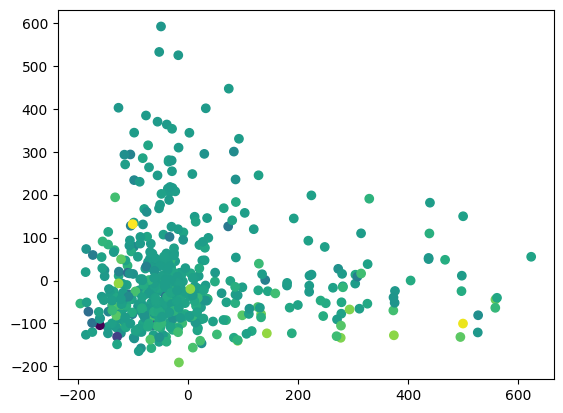

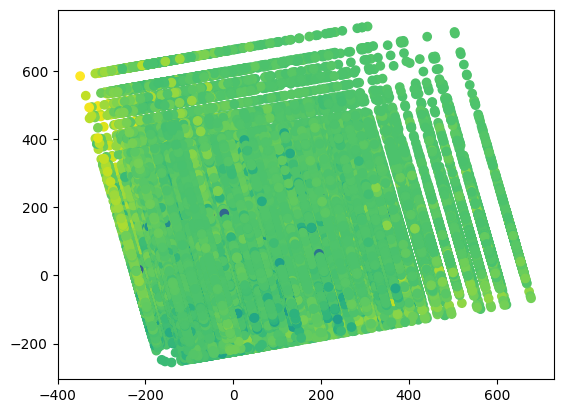

In [26]:
X1, Y1 = md.get_vars(train)
X2, Y2 = md.get_vars(train2)
# plot the distribution of the training set with a 2d pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1)
X2_pca = pca.fit_transform(X2)
import matplotlib.pyplot as plt
plt.scatter(X1_pca[:,0], X1_pca[:,1], c=Y1)
plt.show()
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=Y2)
plt.show()


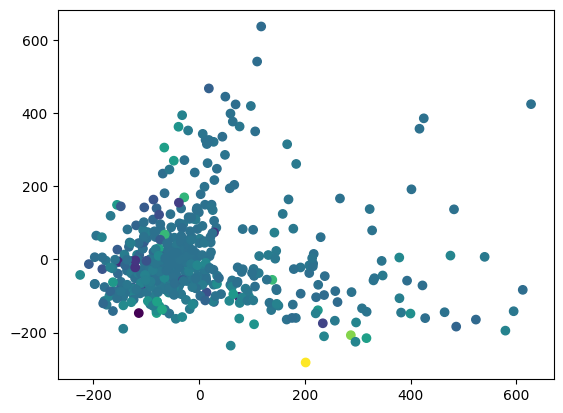

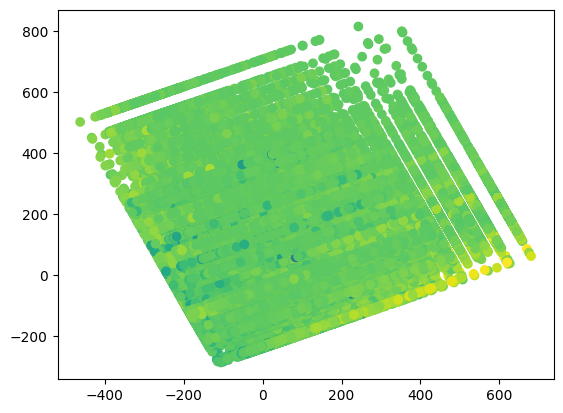

In [27]:
# plot the distribution of the test set with a 2d pca
X1, Y1 = md.get_vars(test)
X2, Y2 = md.get_vars(test2)
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1)
X2_pca = pca.fit_transform(X2)
import matplotlib.pyplot as plt
plt.scatter(X1_pca[:,0], X1_pca[:,1], c=Y1)
plt.show()
plt.scatter(X2_pca[:,0], X2_pca[:,1], c=Y2)
plt.show()


In [23]:
test2.shape, test.shape

((218821, 129), (212, 129))